In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Stochastic Gradient Descent**

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6509 - loss: 1.3337 - val_accuracy: 0.8837 - val_loss: 0.4540
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8830 - loss: 0.4386 - val_accuracy: 0.9005 - val_loss: 0.3531
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9010 - loss: 0.3550 - val_accuracy: 0.9112 - val_loss: 0.3126
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9129 - loss: 0.3170 - val_accuracy: 0.9172 - val_loss: 0.2878
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9160 - loss: 0.2976 - val_accuracy: 0.9222 - val_loss: 0.2690


In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9222 - loss: 0.2690
Test accuracy: 0.9222


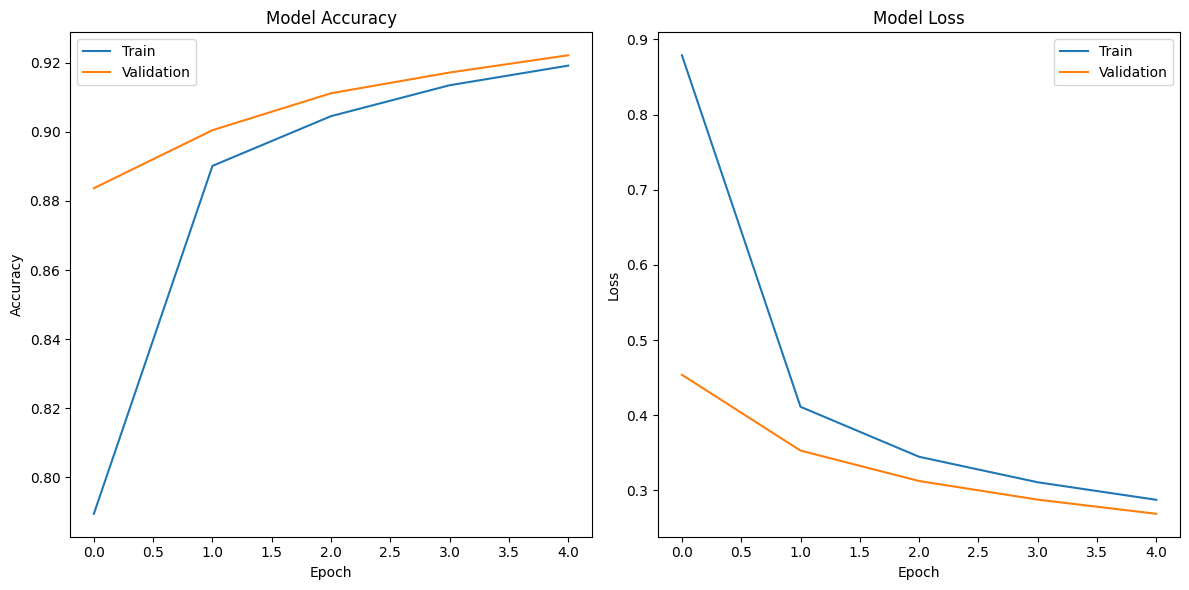

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## **SGD with Momentum**

In [9]:
momentum_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=momentum_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']   )

In [10]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9271 - loss: 0.2584 - val_accuracy: 0.9445 - val_loss: 0.1884
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9495 - loss: 0.1776 - val_accuracy: 0.9561 - val_loss: 0.1506
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9606 - loss: 0.1405 - val_accuracy: 0.9620 - val_loss: 0.1274
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9664 - loss: 0.1200 - val_accuracy: 0.9677 - val_loss: 0.1098
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9726 - loss: 0.0992 - val_accuracy: 0.9698 - val_loss: 0.1009


In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9698 - loss: 0.1009
Test accuracy: 0.9698


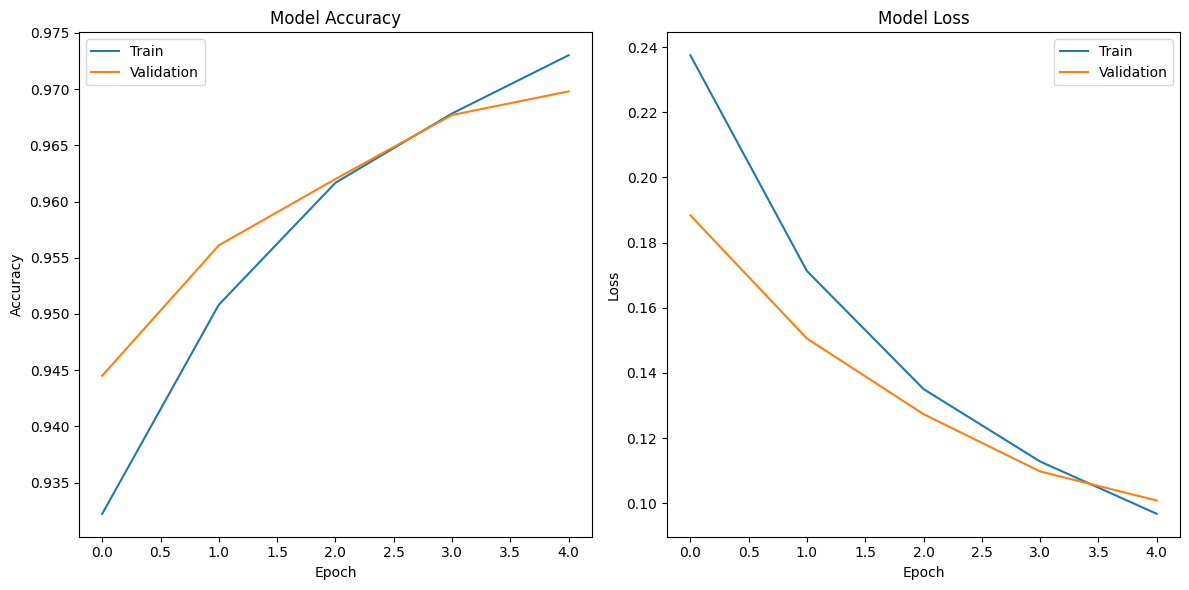

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## **Mini batch gradient descent**

In [13]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9779 - loss: 0.0813 - val_accuracy: 0.9710 - val_loss: 0.0958
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9786 - loss: 0.0770 - val_accuracy: 0.9721 - val_loss: 0.0939
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9794 - loss: 0.0773 - val_accuracy: 0.9717 - val_loss: 0.0934
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9791 - loss: 0.0764 - val_accuracy: 0.9723 - val_loss: 0.0930
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9804 - loss: 0.0739 - val_accuracy: 0.9723 - val_loss: 0.0922


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 0s - 2ms/step - accuracy: 0.9723 - loss: 0.0922
Test accuracy: 0.9723


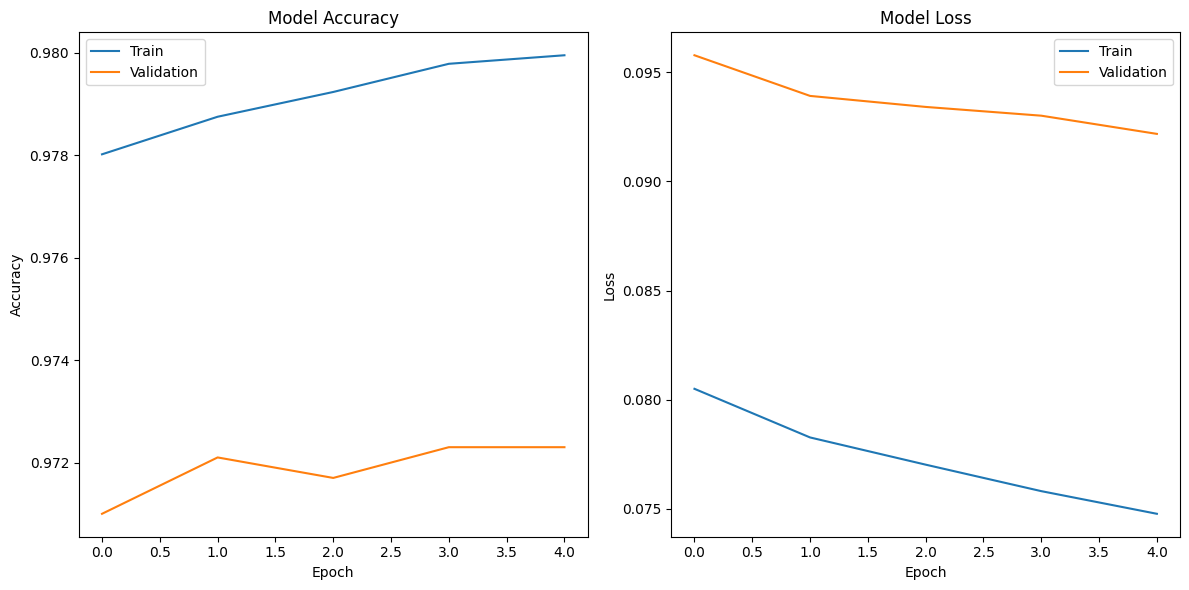

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## **AdaGrad**

In [17]:
adagrad_optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(
    optimizer=adagrad_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9804 - loss: 0.0733 - val_accuracy: 0.9730 - val_loss: 0.0914
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9801 - loss: 0.0726 - val_accuracy: 0.9720 - val_loss: 0.0906
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9820 - loss: 0.0667 - val_accuracy: 0.9725 - val_loss: 0.0878
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9823 - loss: 0.0661 - val_accuracy: 0.9735 - val_loss: 0.0863
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9832 - loss: 0.0649 - val_accuracy: 0.9745 - val_loss: 0.0845
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9838 - loss: 0.0614 - val_accuracy: 0.9737 - val_loss: 0.0838
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9841 - loss: 0.0606 - val_accuracy: 0.9745 - val_loss: 0.0826
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9845 - loss: 0.0581 - val_accuracy: 0.

In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9748 - loss: 0.0798
Test accuracy: 0.9748


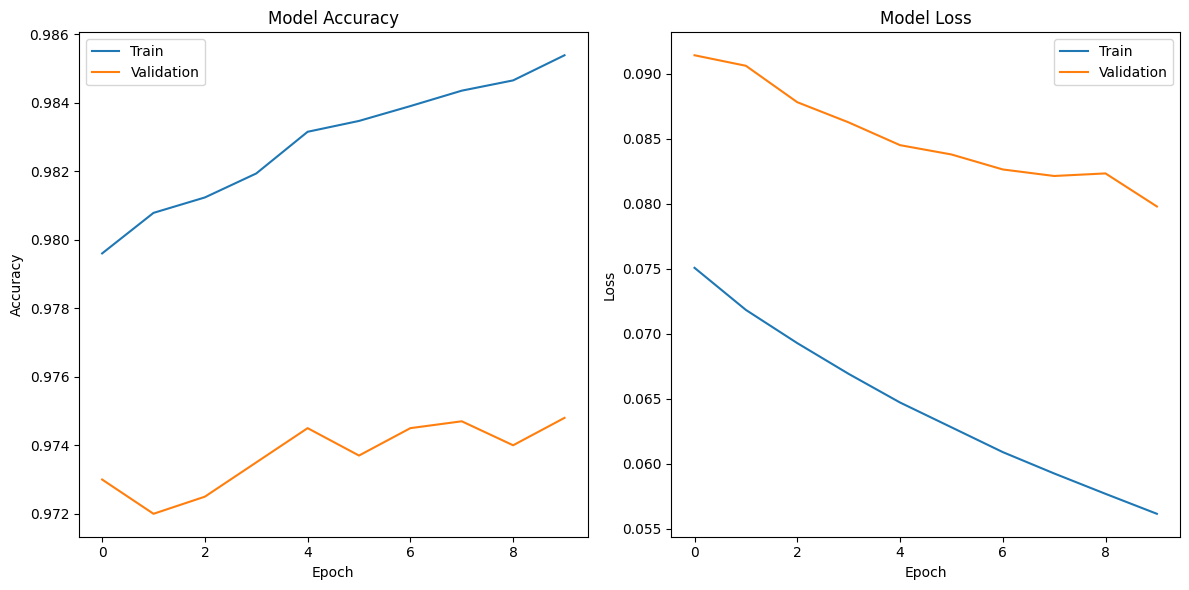

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## **RMS Prop**

In [21]:
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(
    optimizer=rmsprop_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9771 - loss: 0.0742 - val_accuracy: 0.9737 - val_loss: 0.0860
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9819 - loss: 0.0588 - val_accuracy: 0.9735 - val_loss: 0.0844
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9848 - loss: 0.0487 - val_accuracy: 0.9733 - val_loss: 0.0880
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9880 - loss: 0.0400 - val_accuracy: 0.9759 - val_loss: 0.0776
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9901 - loss: 0.0331 - val_accuracy: 0.9765 - val_loss: 0.0792


In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9765 - loss: 0.0792
Test accuracy: 0.9765


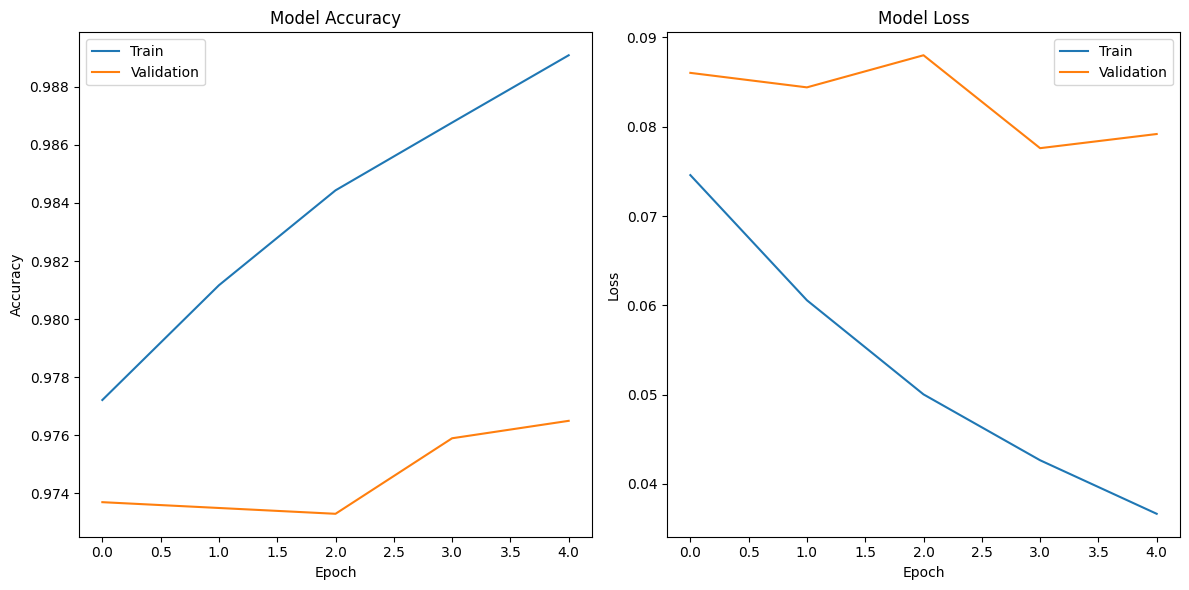

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## **Ada Delta**

In [25]:
# Compile the model using AdaDelta optimizer
adadelta_optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(
    optimizer=adadelta_optimizer,  # Use AdaDelta optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metrics to track
)

In [26]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9937 - loss: 0.0228 - val_accuracy: 0.9786 - val_loss: 0.0721
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9951 - loss: 0.0196 - val_accuracy: 0.9793 - val_loss: 0.0686
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9960 - loss: 0.0164 - val_accuracy: 0.9776 - val_loss: 0.0724
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9968 - loss: 0.0142 - val_accuracy: 0.9794 - val_loss: 0.0690
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9973 - loss: 0.0129 - val_accuracy: 0.9763 - val_loss: 0.0794


In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9763 - loss: 0.0794
Test accuracy: 0.9763


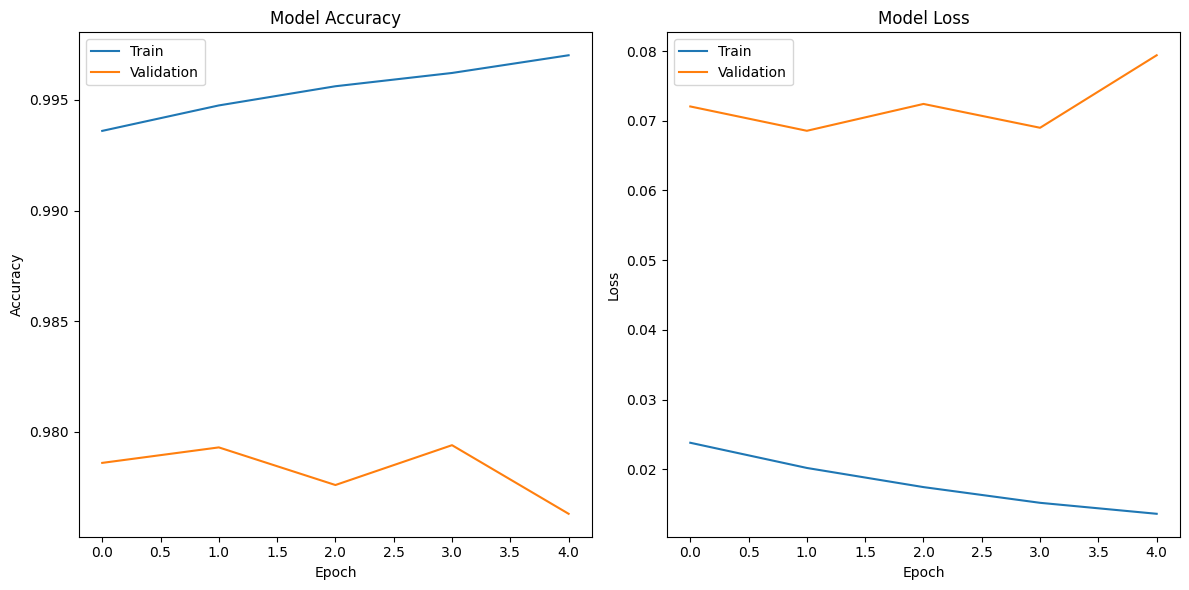

In [28]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## **Adam**

In [29]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accuracy: 0.9775 - val_loss: 0.0763
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9952 - loss: 0.0165 - val_accuracy: 0.9759 - val_loss: 0.0866
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.9784 - val_loss: 0.0856
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9782 - val_loss: 0.0842
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9972 - loss: 0.0098 - val_accuracy: 0.9790 - val_loss: 0.0818


In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9790 - loss: 0.0818
Test accuracy: 0.9790


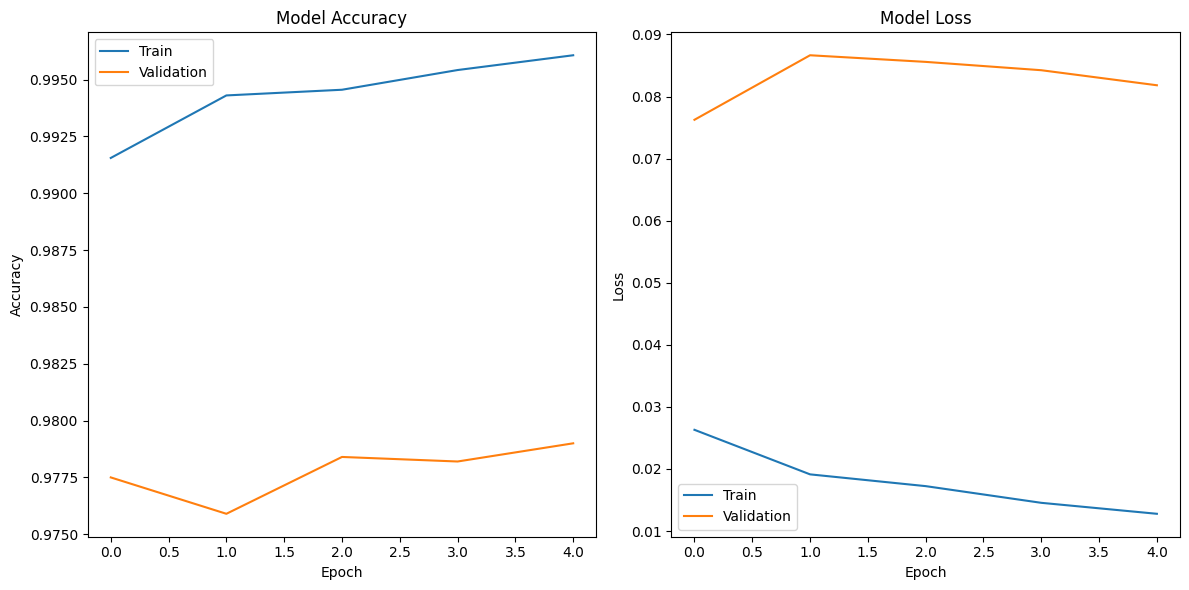

In [32]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

Training with SGD optimizer...
Training with AdaGrad optimizer...
Training with RMSprop optimizer...
Training with AdaDelta optimizer...
Training with Adam optimizer...


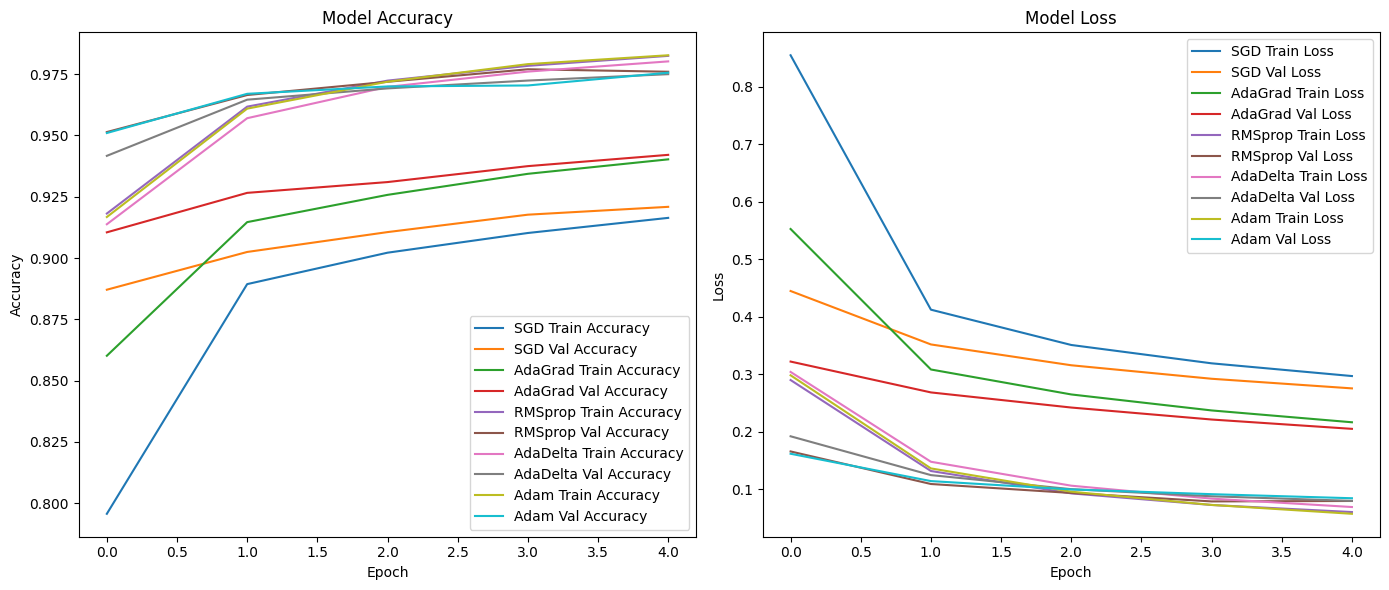

In [33]:
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'AdaDelta': tf.keras.optimizers.Adadelta(learning_rate=1.0),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

histories = {}

for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = build_model(optimizer)
    history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=0  # Suppress output
    )
    histories[name] = history.history

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'{name} Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history['loss'], label=f'{name} Train Loss')
    plt.plot(history['val_loss'], label=f'{name} Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## **Summary**

1. **Stochastic Gradient Descent (SGD):** Updates model parameters using the gradient from a single training example, introducing randomness that can help escape local minima and speed up convergence, though it requires careful tuning of hyperparameters.

2. **AdaGrad:** Adapts learning rates based on historical gradients, increasing rates for infrequent updates and decreasing them for frequent ones, making it effective for sparse data but prone to overly small learning rates over time.

3. **Mini-Batch Gradient Descent:** Updates model parameters using a subset of the data, reducing variance in updates and balancing speed, stability, and computational efficiency compared to SGD and batch gradient descent.

4. **AdaDelta:** Extends AdaGrad by maintaining a moving average of gradient updates to avoid rapid learning rate decay, stabilizing training and improving convergence, especially in sparse or variable gradient scenarios.

5. **RMSprop:** Adjusts learning rates dynamically by maintaining a moving average of squared gradients, preventing learning rates from becoming too large or small, and stabilizing training, particularly for non-stationary objectives.

6. **Adam:** Combines the benefits of AdaGrad and RMSprop, calculating adaptive learning rates using estimates of the first and second moments of gradients, making it effective for handling noisy data and sparse gradients.

7. **SGD with Momentum:** Enhances SGD by incorporating a momentum term that maintains a moving average of past gradients, speeding up convergence and reducing oscillations, particularly in high-curvature or noisy gradient scenarios.